## A comparison of 2017 Apple and Microsoft stock data

In [ ]:
[blue_text](url_here)

In [1]:
## import csv file 
import pandas as pd
df = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")

In [2]:
## had to convert date column to datetime type bc of issues w/ filtering 
df['Date'] =  pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['yr_mnth'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))  

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

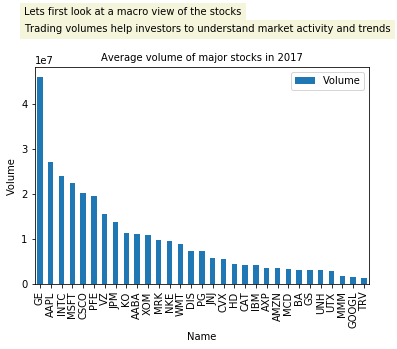

In [147]:
df2 = df[df['year']==2017]
df2 = df2.groupby(['Name'])['Volume'].mean()
df2 = df2.reset_index()
df2sorted = df2.sort_values('Volume',ascending=False)
df2sorted = df2sorted.set_index(df2sorted['Name'])


ax2 = df2sorted.plot(kind='bar')
ax2.set_title("Average volume of major stocks in 2017", fontsize=10)
ax2.set_xlabel("Name", fontsize=10)
ax2.set_ylabel("Volume", fontsize=10)

plt.figtext(0.1, 1.06, 'Lets first look at a macro view of the stocks',backgroundcolor='beige')
plt.figtext(0.1, 1, 'Trading volumes help investors to understand market activity and trends',backgroundcolor='beige')

plt.show()



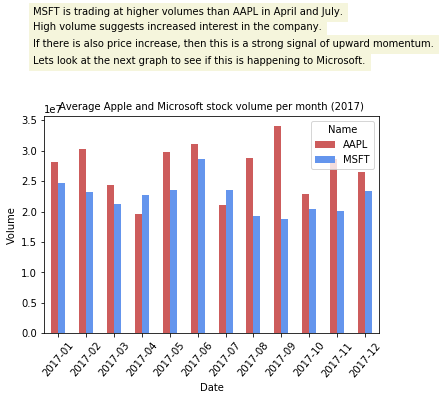

In [70]:
df33 = df[df['Name'].isin(['AAPL','MSFT'])]
df33 = df33[(df33['Date'] >= '1/1/2017') & (df33['Date'] <= '12/31/2017')]
my_colors = ['indianred','cornflowerblue']
ax33 = df33.groupby(['yr_mnth','Name'])['Volume'].mean().unstack().plot(kind='bar',color=my_colors)
ax33.set_title("Average Apple and Microsoft stock volume per month (2017)", fontsize=10)
ax33.set_xlabel("Date", fontsize=10)
ax33.set_ylabel("Volume", fontsize=10)

plt.figtext(0.1, 1.23, 'MSFT is trading at higher volumes than AAPL in April and July.',backgroundcolor='beige')
plt.figtext(0.1, 1.18, 'High volume suggests increased interest in the company.',backgroundcolor='beige')
plt.figtext(0.1, 1.12, 'If there is also price increase, then this is a strong signal of upward momentum.',backgroundcolor='beige')
plt.figtext(0.1, 1.06, 'Lets look at the next graph to see if this is happening to Microsoft.',backgroundcolor='beige')

plt.xticks(rotation=50)

plt.show()

In [72]:
df5 = df[df['Name'].isin(['AAPL','MSFT'])]
df5 = df5[(df5['Date'] >= '1/1/2017') & (df5['Date'] <= '12/31/2017')]
df5 = df5.set_index(pd.DatetimeIndex(df5['Date']))
df5 = df5.groupby('Name')
df5 = df5.resample('M').mean()
df5 = df5.reset_index() 

In [73]:
df6 = df[(df['Date'] >= '1/1/2017') & (df['Date'] <= '12/31/2017')]
df6 = df6[df6['Name'] == 'MSFT']

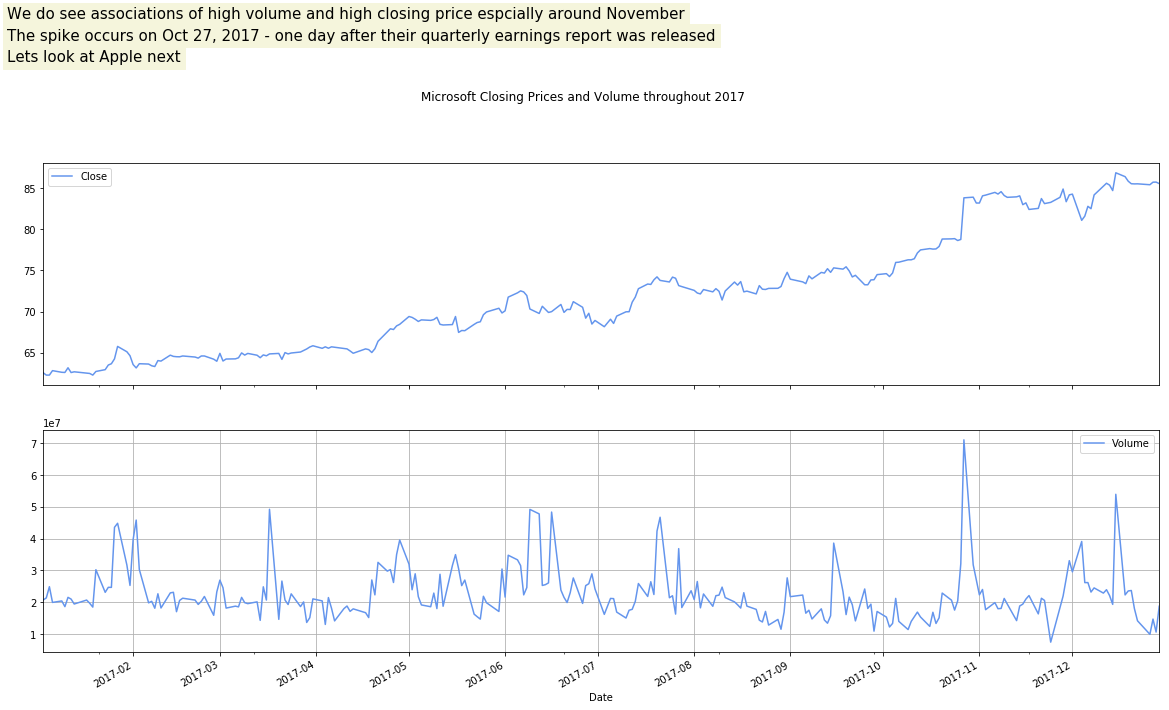

In [135]:
df6 = df6.set_index(pd.DatetimeIndex(df6['Date']))
plots = df6[['Close', 'Volume']].plot(subplots=True, figsize=(20, 10),color='cornflowerblue',title='Microsoft Closing Prices and Volume throughout 2017')

plt.figtext(0.1, 1.08,'We do see associations of high volume and high closing price espcially around November',fontsize=15,backgroundcolor='beige')
plt.figtext(0.1, 1.05,'The spike occurs on Oct 27, 2017 - one day after their quarterly earnings report was released',fontsize=15,backgroundcolor='beige')
plt.figtext(0.1, 1.02,'Lets look at Apple next',fontsize=15,backgroundcolor='beige')
plt.grid()
plt.show()


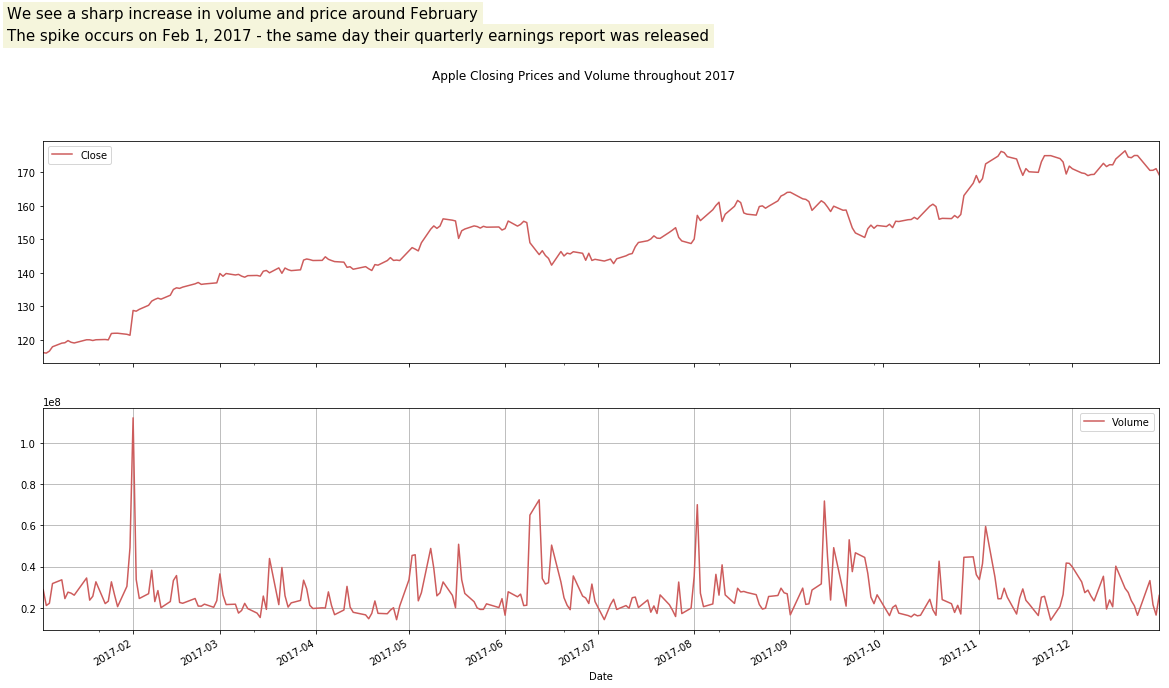

In [136]:
df61 = df[(df['Date'] >= '1/1/2017') & (df['Date'] <= '12/31/2017')]
df61 = df61[df61['Name'] == 'AAPL']
df61 = df61.set_index(pd.DatetimeIndex(df6['Date']))
plots = df61[['Close', 'Volume']].plot(subplots=True, figsize=(20, 10),color='indianred',title='Apple Closing Prices and Volume throughout 2017')

plt.figtext(0.1, 1.05,'We see a sharp increase in volume and price around February',fontsize=15,backgroundcolor='beige')
plt.figtext(0.1, 1.02,'The spike occurs on Feb 1, 2017 - the same day their quarterly earnings report was released',fontsize=15,backgroundcolor='beige')
plt.grid()
plt.show()



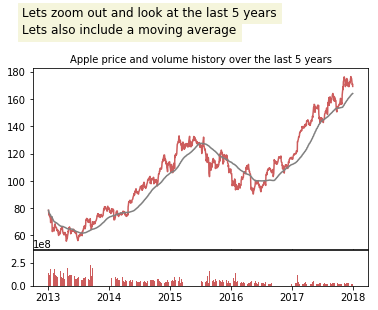

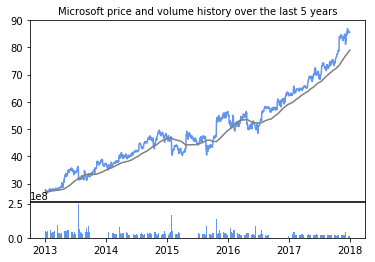

In [151]:
df15= df[df['Name']=='AAPL']
df15 = df15[(df15['Date'] >= '1/1/2013') & (df15['Date'] <= '12/31/2017')]
df15 = df15.set_index(pd.DatetimeIndex(df15['Date']))

df16= df[df['Name']=='MSFT']
df16 = df16[(df16['Date'] >= '1/1/2013') & (df16['Date'] <= '12/31/2017')]
df16 = df16.set_index(pd.DatetimeIndex(df16['Date']))

df15['100ma'] = df15['Close'].rolling(window=100, min_periods=0).mean()

ax1 = plt.subplot2grid((60,6), (0,0), rowspan=50, colspan=6)
ax2 = plt.subplot2grid((60,6), (50,0), rowspan=10, colspan=6, sharex=ax1)

ax1.plot(df15.index, df15['Close'],color='indianred')
ax1.plot(df15.index, df15['100ma'],color='grey')
ax2.bar(df15.index, df15['Volume'],color='indianred')
plt.figtext(0.1, 1.06,'Lets zoom out and look at the last 5 years',fontsize=12,backgroundcolor='beige')
plt.figtext(0.1, 1,'Lets also include a moving average',fontsize=12,backgroundcolor='beige')

ax1.set_title("Apple price and volume history over the last 5 years", fontsize=10)

plt.show()

df16['100ma'] = df16['Close'].rolling(window=100, min_periods=0).mean()

ax1 = plt.subplot2grid((60,6), (0,0), rowspan=50, colspan=6)
ax2 = plt.subplot2grid((60,6), (50,0), rowspan=10, colspan=6, sharex=ax1)

ax1.plot(df16.index, df16['Close'],color='cornflowerblue')
ax1.plot(df16.index, df16['100ma'],color='grey')
ax2.bar(df16.index, df16['Volume'],color='cornflowerblue')

ax1.set_title("Microsoft price and volume history over the last 5 years", fontsize=10)

plt.show()

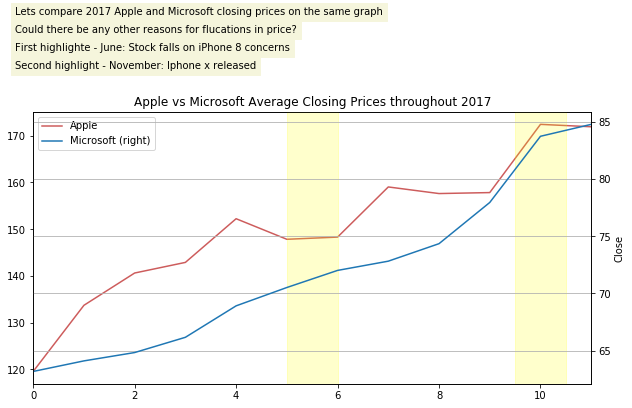

In [153]:
df7 = df[df['Name']=='AAPL']
df7 = df7[(df7['Date'] >= '1/1/2017') & (df7['Date'] <= '12/31/2017')]
df7 = df7[['Name','yr_mnth','Close']]
df7 = df7.groupby(['Name','yr_mnth'])['Close'].mean()
df7 = df7.reset_index()

df8 = df[df['Name']=='MSFT']
df8 = df8[(df8['Date'] >= '1/1/2017') & (df8['Date'] <= '12/31/2017')]
df8 = df8[['Name','yr_mnth','Close']]
df8 = df8.groupby(['Name','yr_mnth'])['Close'].mean()
df8 = df8.reset_index()

df7.Close.plot(label="Apple",color=my_colors, legend=True,title='Apple vs Microsoft Average Closing Prices throughout 2017',figsize=(10, 5))
df8.Close.plot(secondary_y=True, label="Microsoft",figsize=(10, 5), legend=True)

plt.axvspan(5, 6, color='yellow', alpha=0.2)
plt.axvspan(9.5, 10.5, color='yellow', alpha=0.2)
 
plt.figtext(0.1, 1.15, 'Lets compare 2017 Apple and Microsoft closing prices on the same graph',backgroundcolor='beige')
plt.figtext(0.1, 1.10, 'Could there be any other reasons for flucations in price?',backgroundcolor='beige')
plt.figtext(0.1, 1.05, 'First highlighte - June: Stock falls on iPhone 8 concerns',backgroundcolor='beige')
plt.figtext(0.1, 1, 'Second highlight - November: Iphone x released',backgroundcolor='beige')

plt.ylabel("Close")
plt.xlabel("Month")

plt.grid()
plt.show()

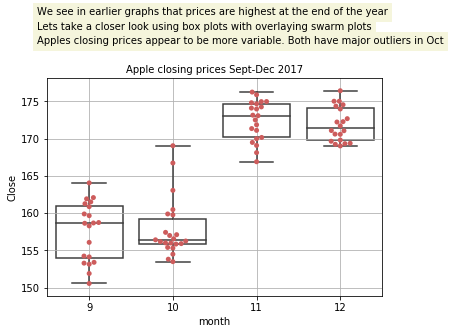

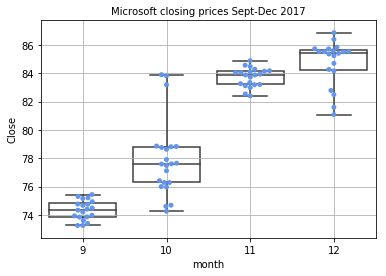

In [154]:
df22 = df[df['Name']=='AAPL']
df22 = df22[(df22['Date'] >= '9/1/2017') & (df22['Date'] <= '12/31/2017')]
ax = sns.boxplot(x="month", y="Close", data=df22, whis=np.inf,boxprops={'facecolor':'None'})
ax = sns.swarmplot(x="month", y="Close", data=df22, color="indianred")
ax.set_title("Apple closing prices Sept-Dec 2017", fontsize=10)


plt.figtext(0.1, 1.10, 'We see in earlier graphs that prices are highest at the end of the year',backgroundcolor='beige')
plt.figtext(0.1, 1.05, 'Lets take a closer look using box plots with overlaying swarm plots',backgroundcolor='beige')
plt.figtext(0.1, 1, 'Apples closing prices appear to be more variable. Both have major outliers in Oct',backgroundcolor='beige')

plt.grid()
plt.show()

df222 = df[df['Name']=='MSFT']
df222 = df222[(df222['Date'] >= '9/1/2017') & (df222['Date'] <= '12/31/2017')]
ax = sns.boxplot(x="month", y="Close", data=df222,  whis=np.inf,boxprops={'facecolor':'None'})
ax = sns.swarmplot(x="month", y="Close", data=df222, color="cornflowerblue")
ax.set_title("Microsoft closing prices Sept-Dec 2017", fontsize=10)

plt.grid()
plt.show()



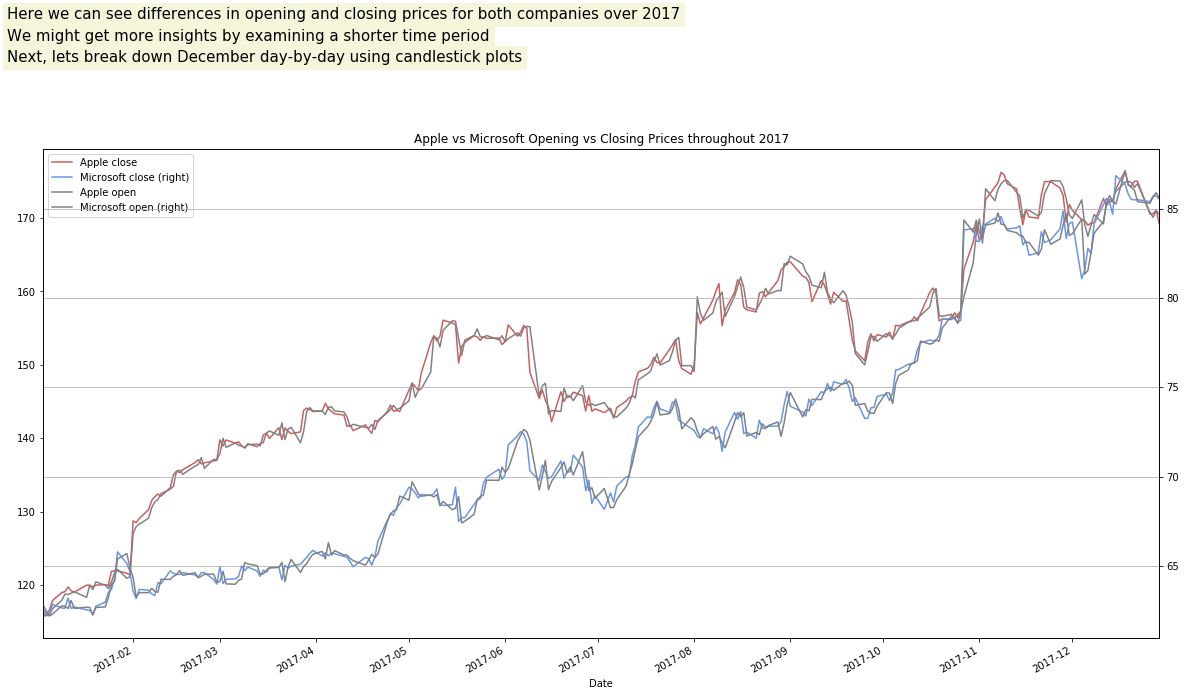

In [159]:
df9 = df[df['Name']=='AAPL']
df9 = df9.reset_index()
df9 = df9[(df9['Date'] >= '1/1/2017') & (df9['Date'] <= '12/31/2017')]
df9 = df9.set_index(pd.DatetimeIndex(df9['Date']))

df91 = df[df['Name']=='MSFT']
df91 = df91.reset_index()
df91 = df91[(df91['Date'] >= '1/1/2017') & (df91['Date'] <= '12/31/2017')]
df91 = df91.set_index(pd.DatetimeIndex(df91['Date']))



df9.Close.plot(label="Apple close",color='indianred', legend=True,title='Apple and Microsoft Opening vs Closing Prices throughout 2017',figsize=(20, 10))
df91.Close.plot(secondary_y=True, label="Microsoft close",color='cornflowerblue',figsize=(20,10), legend=True)
df9.Open.plot(label="Apple open", color= 'grey',legend=True,title='Apple vs Microsoft Opening vs Closing Prices throughout 2017',figsize=(20, 10))
df91.Open.plot(secondary_y=True,color='grey', label="Microsoft open",figsize=(20,10), legend=True)

plt.figtext(0.1, 1.06, 'Here we can see differences in opening and closing prices for both companies over 2017',fontsize=15,backgroundcolor='beige')
plt.figtext(0.1, 1.03, 'We might get more insights by examining a shorter time period',fontsize =15,backgroundcolor='beige')
plt.figtext(0.1, 1, 'Next, lets break down December day-by-day using candlestick plots',fontsize =15,backgroundcolor='beige')
plt.grid()
plt.show()


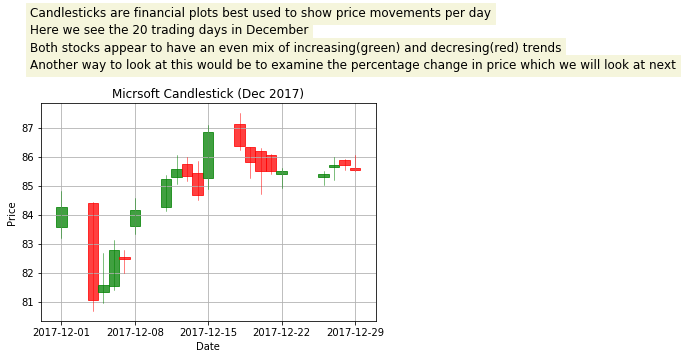

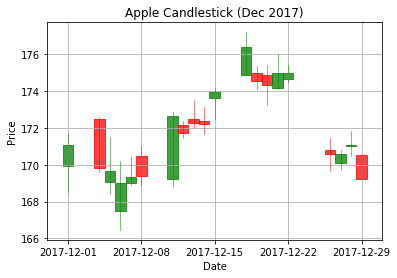

In [144]:
df12=df[df['Name']=='MSFT']
df12=df12[['Date','Open','High','Low','Close']]
df12=df12[(df12['Date'] >= '12/1/2017') & (df12['Date'] <= '12/31/2017')]
df12 = df12.set_index(pd.DatetimeIndex(df12['Date']))
del df12['Date']

df13=df[df['Name']=='AAPL']
df13=df13[['Date','Open','High','Low','Close']]
df13=df13[(df13['Date'] >= '12/1/2017') & (df13['Date'] <= '12/31/2017')]
df13 = df13.set_index(pd.DatetimeIndex(df13['Date']))
del df13['Date']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt

df_ohlc = df12.reset_index()

#Name columns
df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Convert dates float values
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

fig = plt.figure()
ax1 = plt.subplot2grid((20,1), (0,0), rowspan=20, colspan=1)

candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='r',alpha=0.75)
plt.ylabel("Price")
ax1.xaxis_date()
plt.xlabel("Date")
plt.title('Micrsoft Candlestick (Dec 2017)')
plt.figtext(0.1, 1.18, 'Candlesticks are financial plots best used to show price movements per day',fontsize=12,backgroundcolor='beige')
plt.figtext(0.1, 1.12, 'Here we see the 20 trading days in December',fontsize =12,backgroundcolor='beige')
plt.figtext(0.1, 1.06, 'Both stocks appear to have an even mix of increasing(green) and decresing(red) trends',fontsize =12,backgroundcolor='beige')
plt.figtext(0.1, 1, 'Another way to look at this would be to examine the percentage change in price which we will look at next',fontsize=12,backgroundcolor='beige')
plt.grid()
plt.show()


# repeat with AAPL data
df_ohlc2 = df13.reset_index()

df_ohlc2.columns = ["Date","Open","High",'Low',"Close"]

df_ohlc2['Date'] = df_ohlc2['Date'].map(mdates.date2num)

fig = plt.figure()
ax1 = plt.subplot2grid((20,1), (0,0), rowspan=20, colspan=1)

candlestick_ohlc(ax1,df_ohlc2.values,width=1, colorup='g', colordown='r',alpha=0.75)
plt.ylabel("Price")
ax1.xaxis_date()
plt.xlabel("Date")
plt.title('Apple Candlestick (Dec 2017)')
plt.grid()
plt.show()

In [106]:
df['% change'] = ((df['Close']-df['Open']) / df['Close'])

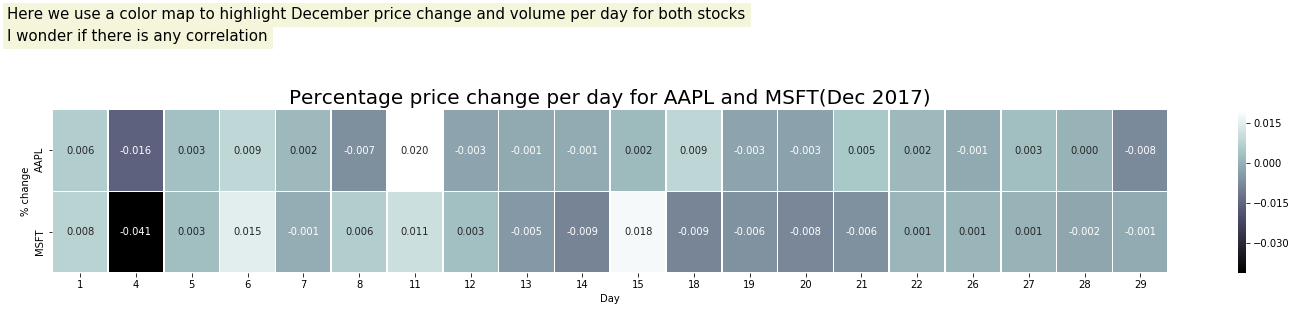

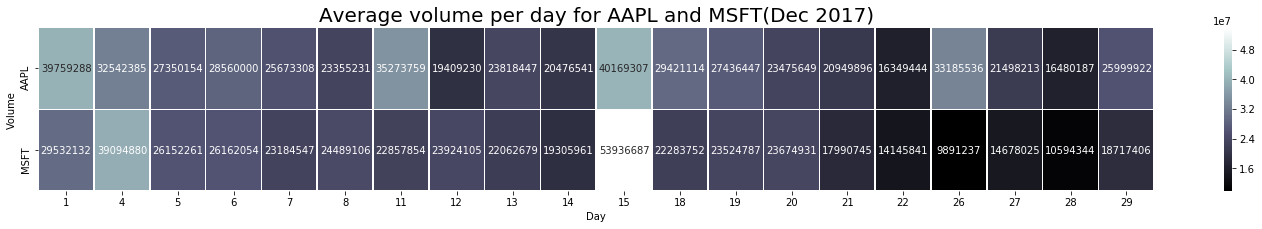

In [120]:
df12 = df[df['Name'].isin(['AAPL','MSFT'])]
df12 = df12[(df12['Date'] >= '12/1/2017') & (df12['Date'] <= '12/31/2017')]
df12 = df12.pivot_table(index='Name', columns='day', values='% change', aggfunc=np.mean) 
fig, ax = plt.subplots(figsize=(25,3))
sns.heatmap(df12, annot=True, fmt=".03f",linewidths=.5,cmap="bone", annot_kws={"size": 10})
ax.set_title("Percentage price change per day for AAPL and MSFT(Dec 2017)", fontsize=20)
ax.set_xlabel("Day", fontsize=10)
ax.set_ylabel("% change", fontsize=10)

plt.figtext(0.1, 1.3, 'Here we use a color map to highlight December price change and volume per day for both stocks',fontsize=15,backgroundcolor='beige')
plt.figtext(0.1, 1.2, 'I wonder if there is any correlation',fontsize=15,backgroundcolor='beige')

df11 = df[df['Name'].isin(['AAPL','MSFT'])]
df11 = df11[(df11['Date'] >= '12/1/2017') & (df11['Date'] <= '12/31/2017')]
df11 = df11.pivot_table(index='Name', columns='day', values='Volume', aggfunc=np.mean) 
fig, ax = plt.subplots(figsize=(25,3))
sns.heatmap(df11, annot=True, fmt=".0f",linewidths=.5,cmap="bone", annot_kws={"size": 10})
ax.set_title("Average volume per day for AAPL and MSFT(Dec 2017)", fontsize=20)
ax.set_xlabel("Day", fontsize=10)
ax.set_ylabel("Volume", fontsize=10)

plt.show()

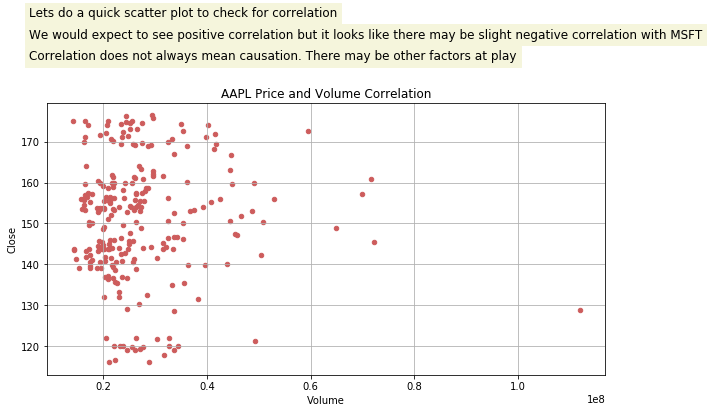

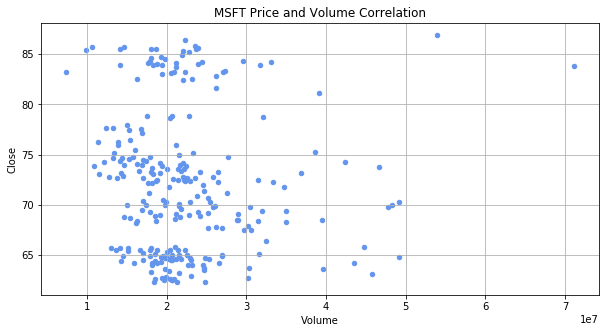

In [158]:
df25 = df[(df['Date'] >= '1/1/2017') & (df['Date'] <= '12/31/2017')]
df25 = df25[df25['Name']=='AAPL']
df26 = df[(df['Date'] >= '1/1/2017') & (df['Date'] <= '12/31/2017')]
df26 = df26[df26['Name']=='MSFT']

df25.plot(kind='scatter', x='Volume', y='Close',title='AAPL Price and Volume Correlation',color='indianred',figsize=(10,5))
plt.figtext(0.1, 1.12, 'Lets do a quick scatter plot to check for correlation',fontsize=12,backgroundcolor='beige')
plt.figtext(0.1, 1.06, 'We would expect to see positive correlation but it looks like there may be slight negative correlation with MSFT',fontsize=12,backgroundcolor='beige')
plt.figtext(0.1, 1, 'Correlation does not always mean causation. There may be other factors at play',fontsize=12,backgroundcolor='beige')
plt.grid()

df26.plot(kind='scatter', x='Volume', y='Close',title='MSFT Price and Volume Correlation',color='cornflowerblue',figsize=(10,5))
plt.grid()
plt.show()